In [2]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('twitter_training.csv')

In [6]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
col_names=['ID', 'Entity', 'Sentiments', 'Contest']
df = pd.read_csv('twitter_training.csv', names=col_names)

In [9]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.shape

(74682, 4)

In [13]:
display(df.describe().head())

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000


In [14]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,686


In [15]:
df.dropna(axis=0, inplace=True)

In [16]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,0


In [17]:
df.duplicated().sum()

np.int64(2340)

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(71656, 4)

In [22]:
sentiment_counts = df['Sentiments'].value_counts()
sentiment_counts

,count
Sentiments,
Negative,21698
Positive,19713
Neutral,17708
Irrelevant,12537


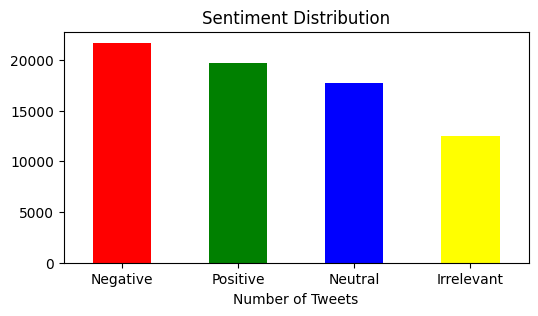

In [23]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue', 'yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [24]:
brand_data=df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiments_counts=brand_data['Sentiments'].value_counts()
brand_sentiments_counts

,count
Sentiments,
Neutral,816
Negative,748
Positive,573
Irrelevant,167


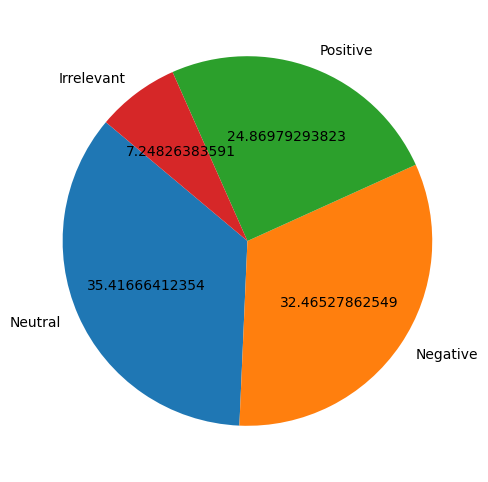

In [27]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiments_counts.values, labels=brand_sentiments_counts.index, autopct='%1.11f', startangle = 140)
plt.show()